<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №2 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>


### **Тема:** Дослідження базових технік обробки зображень: гістограми, порогова обробка, фільтрація та детектування країв

### **Мета роботи**

Метою даної роботи було поглиблене вивчення та практичне застосування фундаментальних методів обробки зображень з використанням бібліотек **OpenCV** та **Matplotlib**. Основні завдання включали:
1.  Аналіз розподілу яскравості пікселів шляхом побудови та візуалізації гістограм для відтінків сірого та RGB каналів.
2.  Дослідження методів сегментації зображення за допомогою глобальної (фіксованої, Оцу, трикутної) та адаптивної порогової обробки.
3.  Застосування просторових фільтрів для згладжування зображення (фільтр Гауса).
4.  Реалізація та порівняння градієнтних методів детектування країв (оператори Собеля та Лапласа).

### **Опис коду**

Скрипт є комплексним дослідженням, що демонструє декілька ключових технік обробки зображень. Він складається з допоміжних функцій для візуалізації та основних блоків, що виконують конкретні операції.

#### **Структура коду:**

1.  **Допоміжні функції:**
    * `show_images`: Універсальна функція для відображення набору зображень у вигляді сітки за допомогою `matplotlib`. Вона коректно обробляє як кольорові (конвертуючи BGR в RGB), так і монохромні зображення.
    * `Threshold_Demo`: Функція, що застосовує до зображення декілька методів бінаризації: три з фіксованим порогом та два автоматичних (Оцу та трикутний).
    * `plot_histograms`: Функція для розрахунку та побудови гістограм яскравості для монохромного зображення та для кожного з R, G, B каналів кольорового.

2.  **Основний потік виконання:**
    * **Завантаження:** Скрипт завантажує зображення `kpi.jpg` і створює його копію у відтінках сірого.
    * **Аналіз гістограм:** Будуються та відображаються гістограми, що показують розподіл інтенсивності пікселів.
    * **Порогова обробка:** Демонструється робота різних алгоритмів бінаризації, як глобальних, так і адаптивних (`ADAPTIVE_THRESH_MEAN_C`, `ADAPTIVE_THRESH_GAUSSIAN_C`).
    * **Фільтрація та виділення країв:** Послідовно застосовуються такі операції:
        * Зміна колірного простору на HSV.
        * Розмиття за Гаусом з різними параметрами для зменшення шуму.
        * Застосування операторів Лапласа та Собеля для виявлення країв (контурів об'єктів).
        * Обчислення та візуалізація величини градієнта для отримання більш чіткої карти країв.

### **Результат виконання**

У результаті роботи скрипта було отримано серію візуалізацій, що демонструють ефекти від застосування кожної з технік.

1.  **Гістограми:** Побудовані графіки чітко показали розподіл яскравості пікселів для кожного каналу, що є корисним для подальшого аналізу та вибору порогів.
    

2.  **Порогова обробка:** Було продемонстровано, що прості методи бінаризації ефективні для контрастних зображень, тоді як адаптивні методи дають значно кращий результат на зображеннях з нерівномірним освітленням.
    

3.  **Фільтрація та виділення країв:** Візуальні результати показали, як розмиття за Гаусом прибирає дрібні деталі та шум. Оператори Собеля ефективно виділили вертикальні та горизонтальні краї, а оператор Лапласа — області швидкої зміни інтенсивності. Обчислення величини градієнта дозволило об'єднати інформацію про краї з обох напрямків в єдине зображення.

### **Висновок**

Під час виконання цієї лабораторної роботи я поглибив свої знання та практичні навички у сфері комп'ютерного зору. Я детально розібрався в наступних аспектах:

* **Гістограми** є потужним інструментом для аналізу зображень, що дозволяє оцінити контрастність та розподіл яскравості.
* **Методи бінаризації** є ключовим етапом для багатьох задач сегментації, причому вибір між **глобальним** та **адаптивним** порогом залежить від умов освітлення на зображенні.
* **Просторова фільтрація**, зокрема **фільтр Гауса**, є невід'ємною частиною попередньої обробки для усунення шумів.
* **Градієнтні оператори (Собеля, Лапласа)** є основою для алгоритмів детектування країв, які, своєю чергою, використовуються для виділення контурів об'єктів.

Я отримав цінний досвід роботи з функціоналом бібліотек **OpenCV** та **Matplotlib**, що дозволило мені реалізувати та візуалізувати цілий конвеєр обробки зображення.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def process_image(image_path: str, method: str, **kargs) -> None:
    """
    Обробляє зображення для розпізнавання фігур та відображає результат
    у Jupyter Notebook.

    Args:
        image_path: Шлях до зображення.
        method: Метод обробки ('threshold', 'laplacian', 'canny').
    """
    # Завантаження зображення
    image = cv2.imread(image_path)
    if image is None:
        print(f"Помилка: не вдалося завантажити зображення за шляхом {image_path}")
        return

    # Попередня обробка
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 1. Метод порогової обробки
    if method == 'threshold':
        _, edges = cv2.threshold(blurred, **kargs, type=cv2.THRESH_BINARY_INV)
        window_title = "Shapes Detected (Threshold Method)"
    # 2. Метод Лапласа
    elif method == 'laplacian':
        laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
        edges = np.uint8(np.absolute(laplacian))
        _, edges = cv2.threshold(edges, **kargs, type=cv2.THRESH_BINARY)
        window_title = "Shapes Detected (Laplacian Method)"
    # 3. Метод Кенні
    elif method == 'canny':
        edges = cv2.Canny(blurred, **kargs)
        window_title = "Shapes Detected (Canny Method)"
    else:
        print("Помилка: невідомий метод. Використовуйте 'threshold', 'laplacian' або 'canny'.")
        return

    # Пошук та обробка контурів
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < 100:
            continue

        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
        num_sides = len(approx)

        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        cv2.putText(image, str(num_sides), (cX - 10, cY), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255, 255, 255), 2)

    # Конвертуємо зображення з BGR (OpenCV) в RGB (Matplotlib)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Відображення результату за допомогою Matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image)
    plt.title(window_title+f'{kargs}')
    plt.axis('off') # Вимкнути осі для чистого вигляду
    return plt

In [48]:
image_file = 'shapes.jpg'

<module 'matplotlib.pyplot' from 'c:\\Users\\kek\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

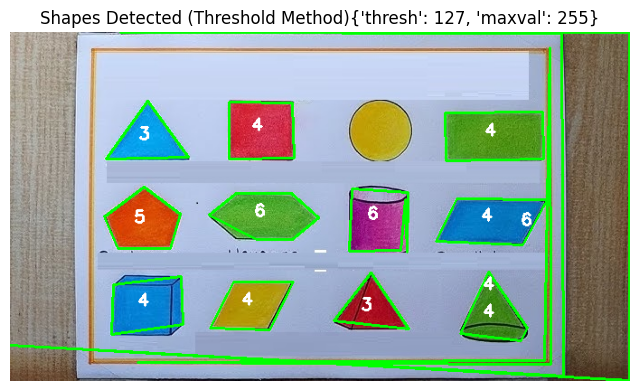

In [53]:
# for t in range(0, 255, 10):
#     process_image(image_file, 'threshold', thresh=t, maxval=255)
process_image(image_file, 'threshold', thresh=127, maxval=255)


<module 'matplotlib.pyplot' from 'c:\\Users\\kek\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

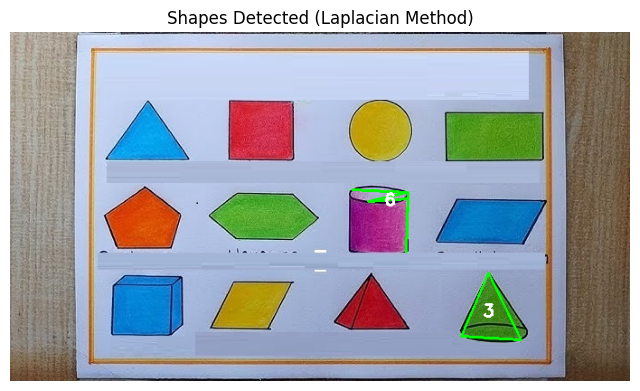

In [ ]:
process_image(image_file, 'laplacian', thresh=30, maxval=255)


<module 'matplotlib.pyplot' from 'c:\\Users\\kek\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

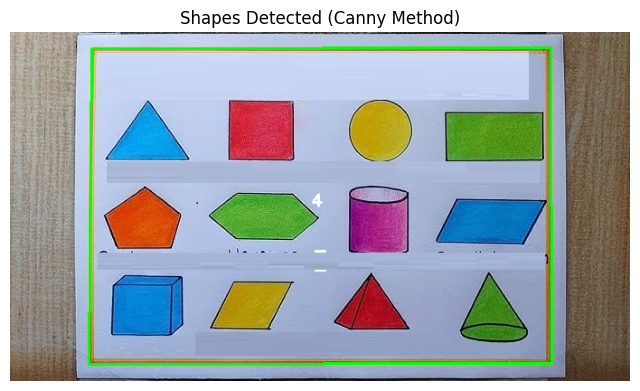

In [34]:
process_image(image_file, 'canny', threshold1=50, threshold2=150)